In [91]:
import numpy as np

class AntColony(object):
    def __init__(self, distances_array, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        創建螞蟻群類
        :param distances_array: 二維陣列，表示各點之間的距離
        :param n_ants: 螞蟻的數量
        :param n_best: 每代中選擇的最佳路徑數量
        :param n_iterations: 迭代的次數
        :param decay: 蒸發率
        :param alpha: 訊息素的重要程度
        :param beta: 可見度的重要程度
        """
        self.distances  = distances_array
        self.pheromone = np.ones(self.distances.shape) / len(distances_array)
        self.all_indexes = range(len(distances_array))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        """ 執行螞蟻群算法 """
        shortest_path_found = None
        all_time_shortest_path = ("placeholder", np.inf)
        cost_list = []  # List to store the cost of shortest path of each iteration
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path_found=shortest_path_found)
            shortest_path_found = min(all_paths, key=lambda x: x[1])
            cost_list.append(shortest_path_found[1])  # Append the cost of the current shortest path
            if shortest_path_found[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path_found
            self.pheromone = self.pheromone * self.decay  # Apply decay to pheromone
        return all_time_shortest_path, cost_list


    def spread_pheromone(self, all_paths, n_best, shortest_path_found):
        """ 傳播訊息素 """
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]
        # Extra pheromone for the current iteration's shortest path
        if shortest_path_found is not None:
            for move in shortest_path_found[0]:
                self.pheromone[move] += 1.0 / self.distances[move]


    def gen_path_dist(self, path):
        """ 計算路徑長度 """
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        """ 生成所有螞蟻的路徑 """
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        """ 生成一條路徑 """
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))  # return to start
        return path

    def pick_move(self, pheromone, dist, visited):
        """ 選擇下一步 """
        pheromone = np.copy(pheromone)  # 複製信息素數組以避免修改原始信息素
        pheromone[list(visited)] = 0  # 將已訪問過的點的信息素設置為0
        row = pheromone ** self.alpha * ((1.0 / (dist + 1e-10)) ** self.beta)  # 避免除以0
        norm_row = row / row.sum()  # 正規化概率分佈
        move = np_choice(self.all_indexes, 1, p=norm_row)[0]  # 根據概率分佈選擇下一步移動
        return move


# Helper function to simulate the probability choice in numpy
def np_choice(a, size, p):
    return np.random.choice(a, size=size, replace=False, p=p)

In [92]:
# Create a sample distance matrix
distances = np.random.randint(low=1, high=30, size=(15, 15))
np.fill_diagonal(distances, 0)  # distances from a node to itself are zero

# Initialize the AntColony
antColony = AntColony(distances_array=distances, n_ants=10, n_best=5, n_iterations=100, decay=0.95, alpha=5, beta=1)

# Run the algorithm
shortest_path, cost = antColony.run()
shortest_path

([(0, 14),
  (14, 12),
  (12, 13),
  (13, 4),
  (4, 11),
  (11, 8),
  (8, 2),
  (2, 1),
  (1, 5),
  (5, 7),
  (7, 10),
  (10, 6),
  (6, 9),
  (9, 3),
  (3, 0)],
 83)

In [93]:
distances

array([[ 0, 19, 28,  2, 13,  9, 26, 24,  6, 14, 18, 18, 22, 14,  2],
       [ 6,  0, 26,  5, 22, 12, 27, 18, 23, 23, 10, 14, 17,  1,  1],
       [20,  2,  0, 13, 18, 14, 10,  8, 22, 25, 23,  5, 12, 14, 25],
       [11, 18, 24,  0, 11, 23,  5, 26, 17, 11,  7, 19, 16, 24, 19],
       [20, 21, 16,  7,  0, 15,  9, 26, 11,  7,  9,  6, 23, 15, 29],
       [11, 21,  7, 15, 16,  0, 15,  1, 21,  7, 13,  6,  9, 24, 11],
       [28,  8, 11, 10, 12, 23,  0,  4, 25, 15,  1,  6, 26, 16, 28],
       [ 7, 25, 14, 27,  7,  8, 22,  0, 27,  6,  4, 12,  5,  6, 20],
       [21, 26,  4,  4, 28, 13,  2, 20,  0,  6,  6, 29, 15, 29, 22],
       [12,  6, 11,  4, 18,  4, 12, 15, 23,  0, 13, 25,  7, 11, 16],
       [10, 25, 21, 23, 24, 15,  1,  9, 29, 27,  0, 24, 28, 28, 15],
       [ 3, 13, 18, 20,  4, 26, 24,  8,  9, 27, 29,  0, 10, 10, 20],
       [ 8, 23, 12, 23,  4, 21, 21, 13, 20,  8, 20, 26,  0,  6,  1],
       [15, 17, 17,  7,  5, 16, 17, 12, 23,  6,  1, 29,  6,  0,  6],
       [ 2, 23, 12, 21, 18,  9, 25

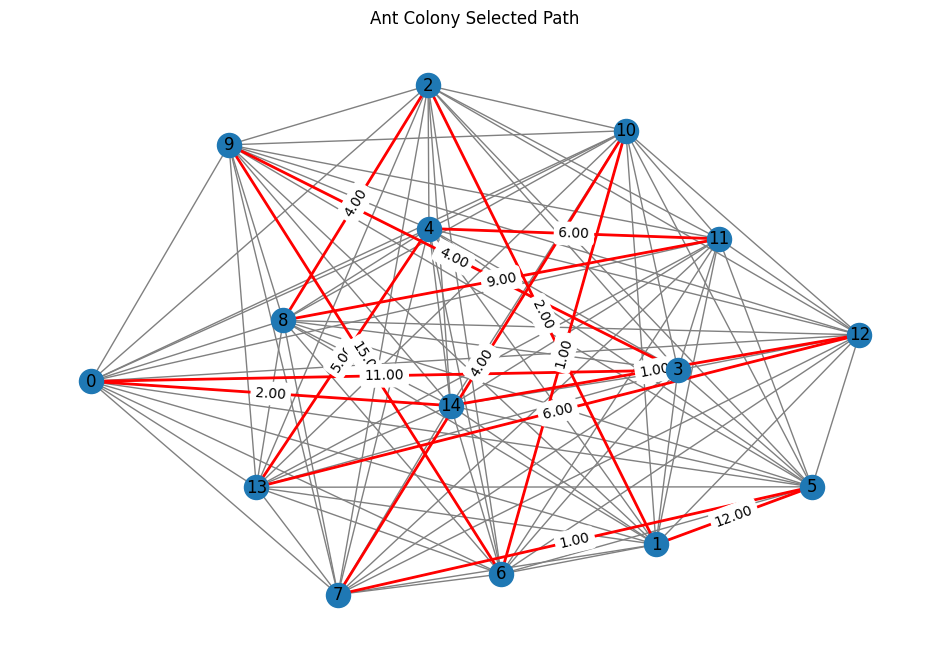

In [94]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph from the distance matrix
G = nx.from_numpy_array(distances)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw all the nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Extract the path edges from the shortest path result
path_edges = [(shortest_path[0][i][0], shortest_path[0][i][1]) for i in range(len(shortest_path[0]))]

# Highlight the path of the ant colony
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{distances[i][j]:.2f}" for i, j in path_edges})

# Show plot
plt.title('Ant Colony Selected Path')
plt.axis('off')  # Hide axis
plt.show()

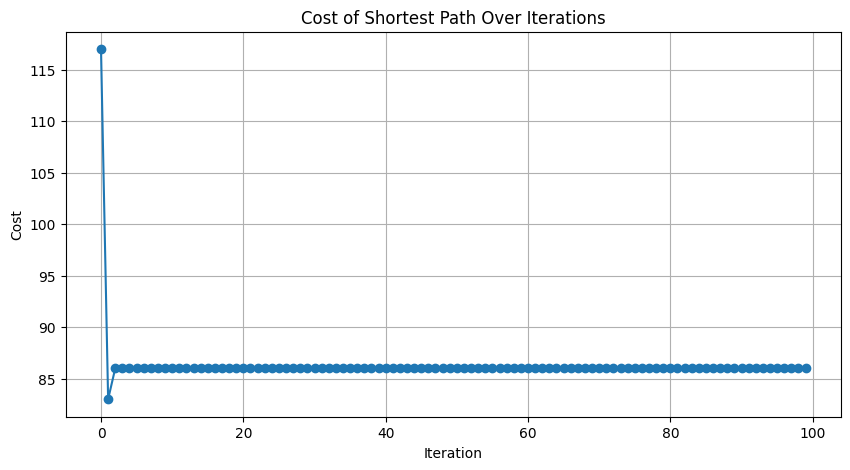

In [95]:
# Plot the costs
plt.figure(figsize=(10, 5))
plt.plot(cost, marker='o')
plt.title('Cost of Shortest Path Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()